# 01 Frequency tables & dot plots

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from statsmodels.graphics.dotplots import dot_plot

In [11]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql import functions as F
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

![Frequency tables & dot plots fig 1](./imgs/02-01-01.png)

In [2]:
dataset = {"Age": [5, 7, 5, 9, 7, 7, 6, 9, 9, 9, 10, 12, 12, 7]}

## DataFrame

### pandas

In [3]:
df = pd.DataFrame(dataset)
df

Age
0     5
1     7
2     5
3     9
4     7
5     7
6     6
7     9
8     9
9     9
10   10
11   12
12   12
13    7

### Spark

In [14]:
sdf = spark.createDataFrame(zip(*dataset.values()), schema=list(dataset.keys()))
sdf.show()

+---+
|Age|
+---+
|  5|
|  7|
|  5|
|  9|
|  7|
|  7|
|  6|
|  9|
|  9|
|  9|
| 10|
| 12|
| 12|
|  7|
+---+



In [5]:
df = pd.DataFrame(dataset)
df

Age
0     5
1     7
2     5
3     9
4     7
5     7
6     6
7     9
8     9
9     9
10   10
11   12
12   12
13    7

## Range

### Pandas

In [69]:
df['Age'].max() - df['Age'].min()

7

### Spark

In [80]:
sdf.select("Age").rdd.max()[0] - sdf.select("Age").rdd.min()[0]

7

## Frequency table 

### Pandas

In [6]:
freq_table_series = df["Age"].value_counts()
freq_table_data = {
    "Age": freq_table_series.index,
    "# at age": freq_table_series.values.tolist(),
}
freq_table_df = pd.DataFrame(freq_table_data)
freq_table_df

Age  # at age
0    7         4
1    9         4
2    5         2
3   12         2
4    6         1
5   10         1

### Spark

In [31]:
freq_table_sdf = spark.createDataFrame(
    zip(*freq_table_data.values()), schema=list(freq_table_data.keys())
)
freq_table_sdf.show()

+---+--------+
|Age|# at age|
+---+--------+
|  7|       4|
|  9|       4|
|  5|       2|
| 12|       2|
|  6|       1|
| 10|       1|
+---+--------+



## How many older than 9

### Pandas

In [36]:
freq_table_df[freq_table_df["Age"] > 9]

Age  # at age
3   12         2
5   10         1

### Spark

In [37]:
freq_table_sdf[freq_table_sdf["Age"] > 9].show()

+---+--------+
|Age|# at age|
+---+--------+
| 12|       2|
| 10|       1|
+---+--------+



## Plot

### Pandas

<AxesSubplot:ylabel='Frequency'>

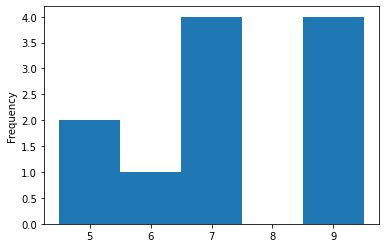

In [39]:
df["Age"].plot(kind="hist", bins=np.array([4, 5, 6, 7, 8, 9]) + 0.5)

### Matplotlib

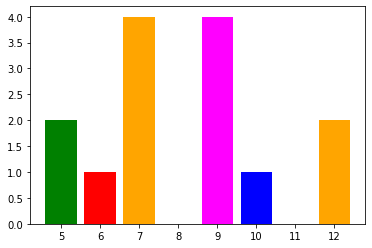

In [9]:
plt.bar(
    x=freq_table_df["Age"],
    height=freq_table_df["# at age"],
    color=["orange", "magenta", "green", "orange", "red", "blue", "brown"],
)
plt.show()

### Seaborn

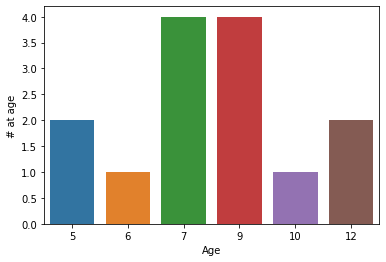

In [10]:
sns.barplot(x=freq_table_df["Age"], y=freq_table_df["# at age"])
plt.show()

### Plotly

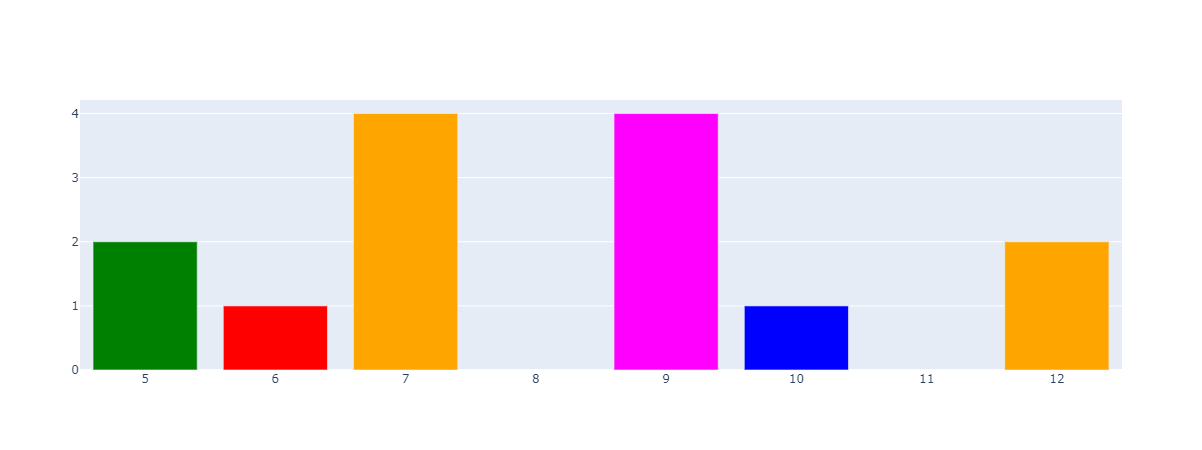

In [7]:
data = [
    go.Bar(
        x=freq_table_df["Age"],
        y=freq_table_df["# at age"],
        marker=dict(color=["orange", "magenta", "green", "orange", "red", "blue"]),
    )
]
fig = go.Figure(data=data)
fig.show()

### Statsmodels

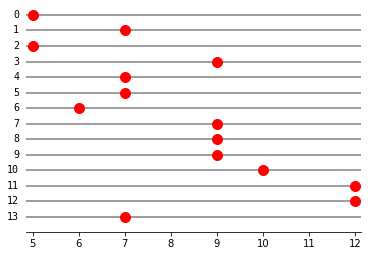

In [11]:
dot_plot(df["Age"])
plt.show()